In [28]:
#Optimistic initial values, it is a solution to Explore-Exploit Dilemma, i.e A/B Testing vs Human Emotion, it is
#UpperConfidenceBound

import numpy as np
import math
import matplotlib.pyplot as plt
import nbimporter
from epsilon_greedy import experiment as run_experiment_eps

In [24]:
class Bandit:
    def __init__(self, m):
        #true mean
        self.m = m
        #our calculated mean
        self.mean = 0
        #iterations
        self.N = 0
    
    def pullArm(self):
        return np.random.randn() + self.m

    def update(self, x):
        self.N += 1
        self.mean = (1.0-1.0/self.N)*self.mean + (1.0/self.N)*x

In [16]:
def experiment(m1, m2, m3, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)
    armSelectionData = np.empty(N)
    for i in range(N):
            
        arm = np.argmax([(b.mean + math.sqrt(2.0 * math.log(i+1)/(b.N+1))) for b in bandits])
            #print (bandits[arm].mean)
            #print (arm)
        armSelectionData[i] = arm
        value = bandits[arm].pullArm()
        bandits[arm].update(value)
        data[i] = value
        
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    # plot moving average ctr
    plt.plot(cumulative_average)
    #plt.plot(armSelectionData + 1)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()
    #print(armSelectionData + 1)
    for b in bandits:
        print(b.mean)

    return cumulative_average

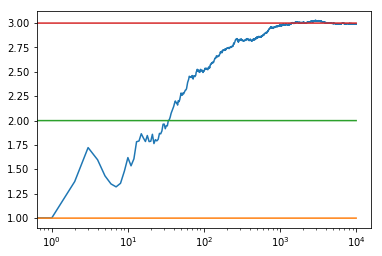

1.3205835665435044
2.115289972066407
2.9946426133310275


In [18]:
if __name__ == '__main__':
    result = experiment(1.0, 2.0, 3.0, 10000)

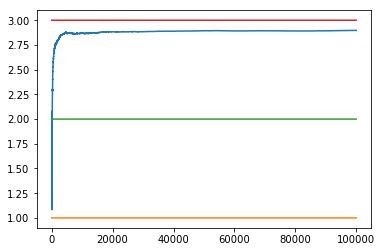

0.9781052498074765
2.0097230883469854
3.0010889976564834


In [29]:
    c_1 = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)

In [38]:
#we can see above how UCB outperforms epsilon greedy
print(np.random.randn())

-0.45433003164908703
